## **Identitas Kelompok 2** ##

1. Ahmad Mafaza Afnani
2. Grace Wahyuni

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing  import StandardScaler, MinMaxScaler, OrdinalEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# **About Dataset** ## 

Dataset ini merupakan bagian dari World Weather Dataset yang telah kami perkecil dengan hanya mengambil daerah yang ada di Asia. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/machineLearningPemula/refs/heads/master/Data/GlobalWeatherRepository.csv')
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55537,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1740564000,2025-02-26 06:00,25.1,77.2,Clear,...,17.390,23.125,2,2,06:43 AM,06:37 PM,05:36 AM,05:33 PM,Waning Crescent,5
55538,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1740564000,2025-02-26 17:00,17.2,63.0,Overcast,...,97.865,98.605,4,10,06:19 AM,06:00 PM,05:00 AM,04:17 PM,Waning Crescent,7
55539,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1740564000,2025-02-26 13:00,23.2,73.8,Sunny,...,27.380,91.020,2,3,06:22 AM,06:10 PM,05:04 AM,04:43 PM,Waning Crescent,6
55540,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1740564000,2025-02-26 12:00,24.4,75.8,Light rain shower,...,9.435,10.915,1,1,06:07 AM,06:32 PM,04:20 AM,05:33 PM,Waning Crescent,6


In [3]:
df_asia = df[df["timezone"].str.contains("Asia", na=False)]

# **Dataset Exploration** 

In [4]:
df_asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13650 entries, 0 to 55539
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  wind_d

In [5]:
df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\129879787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])


In [6]:
df_asia.describe()

,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,13650.000000,13650.000000,1.365000e+04,13650,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,...,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000
mean,26.294177,77.737101,1.728267e+09,2024-10-07 07:45:06.065934080,23.956989,75.124176,7.677934,12.359495,194.665495,1011.667473,...,17.857465,953.769368,74.863048,29.615221,28.260789,40.922215,86.989501,2.205641,3.911868,49.448132
min,-8.560000,33.366700,1.715849e+09,2024-05-16 11:45:00,-24.900000,-12.800000,2.200000,3.600000,1.000000,984.000000,...,3.600000,116.000000,0.000000,0.000000,0.000000,0.500000,-1848.150000,1.000000,1.000000,0.000000
25%,16.783300,47.960000,1.722171e+09,2024-07-28 19:18:45,18.800000,65.800000,3.800000,6.100000,102.000000,1007.000000,...,9.900000,281.200000,40.100000,3.425000,2.960000,11.800000,18.700000,1.000000,1.000000,15.000000
50%,29.366700,73.170000,1.728294e+09,2024-10-07 16:45:00,26.400000,79.600000,6.500000,10.400000,202.000000,1010.000000,...,15.300000,474.000000,71.000000,14.245000,13.505000,25.160000,40.300000,2.000000,3.000000,50.000000
75%,37.566400,104.916700,1.734432e+09,2024-12-17 19:07:30,30.900000,87.600000,10.500000,16.900000,290.000000,1017.000000,...,23.700000,928.237500,102.000000,44.585000,37.200000,48.840000,82.507500,3.000000,6.000000,83.000000
max,51.181100,139.691700,1.740564e+09,2025-02-26 19:00:00,49.200000,120.600000,42.900000,69.100000,360.000000,3000.000000,...,96.300000,38879.398000,480.700000,427.700000,486.180000,874.900000,6037.290000,6.000000,10.000000,100.000000
std,14.459617,30.512448,7.166239e+06,NaN,10.887545,19.597728,4.937598,7.942805,105.396145,18.804986,...,10.772224,1698.941623,48.630234,36.928345,40.247870,54.372275,268.741634,1.172679,3.163146,34.862719


## *Dataset Cleaning* ##

Identifikasi Typo pada kolom Country

In [7]:
df_asia['country'].value_counts()

country
Indonesia                           573
Iran                                570
Thailand                            569
Vietnam                             522
Armenia                             286
Japan                               286
Iraq                                286
Jordan                              286
Myanmar                             286
Bahrain                             286
Uzbekistan                          286
Malaysia                            286
United Arab Emirates                286
Oman                                286
Singapore                           286
Kuwait                              286
Afghanistan                         286
Bhutan                              285
Azerbaijan                          285
Syria                               285
South Korea                         285
Israel                              285
Kazakhstan                          285
Cambodia                            285
China                           

In [8]:
df_asia['country'] = df_asia['country'].replace('Inde', 'India')
df_asia['country'] = df_asia['country'].replace('Jemen', 'Yemen')
df_asia['country'] = df_asia['country'].replace('Südkorea', 'South Korea')
df_asia['country'] = df_asia['country'].replace('Turkménistan', 'Turkmenistan')
df_asia['country'] = df_asia['country'].replace('Saudi Arabien', 'Saudi Arabia')
df_asia['country'] = df_asia['country'].replace('Malásia', 'Malaysia')

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\3920227049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['country'] = df_asia['country'].replace('Inde', 'India')
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\3920227049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['country'] = df_asia['country'].replace('Jemen', 'Yemen')
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\3920227049.py:3: SettingWithCopyWarning: 
A value is trying to 

Identifikasi nilai null 

In [9]:
missing_values = df_asia.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Identifikasi nilai duplikat

In [10]:
print(f'Data yang terduplikasi: {df_asia.duplicated().sum()}')

Data yang terduplikasi: 0


Colomn Type

In [11]:
numeric_features = df_asia.select_dtypes(include='number').shape[1]
category_features = df_asia.select_dtypes(include='object').shape[1]


print(f'Jumlah Kolom Numeric: {numeric_features}')
print(f'Jumlah kolom kategori: {category_features}')
print(f'Dimensi dataset : {df_asia.shape}')

numeric_features = df_asia.select_dtypes(include='number').columns
category_features = df_asia.select_dtypes(include='object').columns


Jumlah Kolom Numeric: 30
Jumlah kolom kategori: 10
Dimensi dataset : (13650, 41)


In [12]:
print(f'jumlah country di asia {df_asia['country'].nunique()}')

jumlah country di asia 45


Dataset Overview

Dataset ini berisi 13.650 baris and 41 kolom.

Jumlah total kolom numerik adalah 30 kolom

Jumlah total kolom kategorikal adalah of 11 kolom

Tidak ada missing value

Tidak ada data yang duplikat di dataset ini

Jumlah kolom unik di kolom Country ada 45

## **EDA dan Visualization**

**Distribusi suhu dan Cuaca**

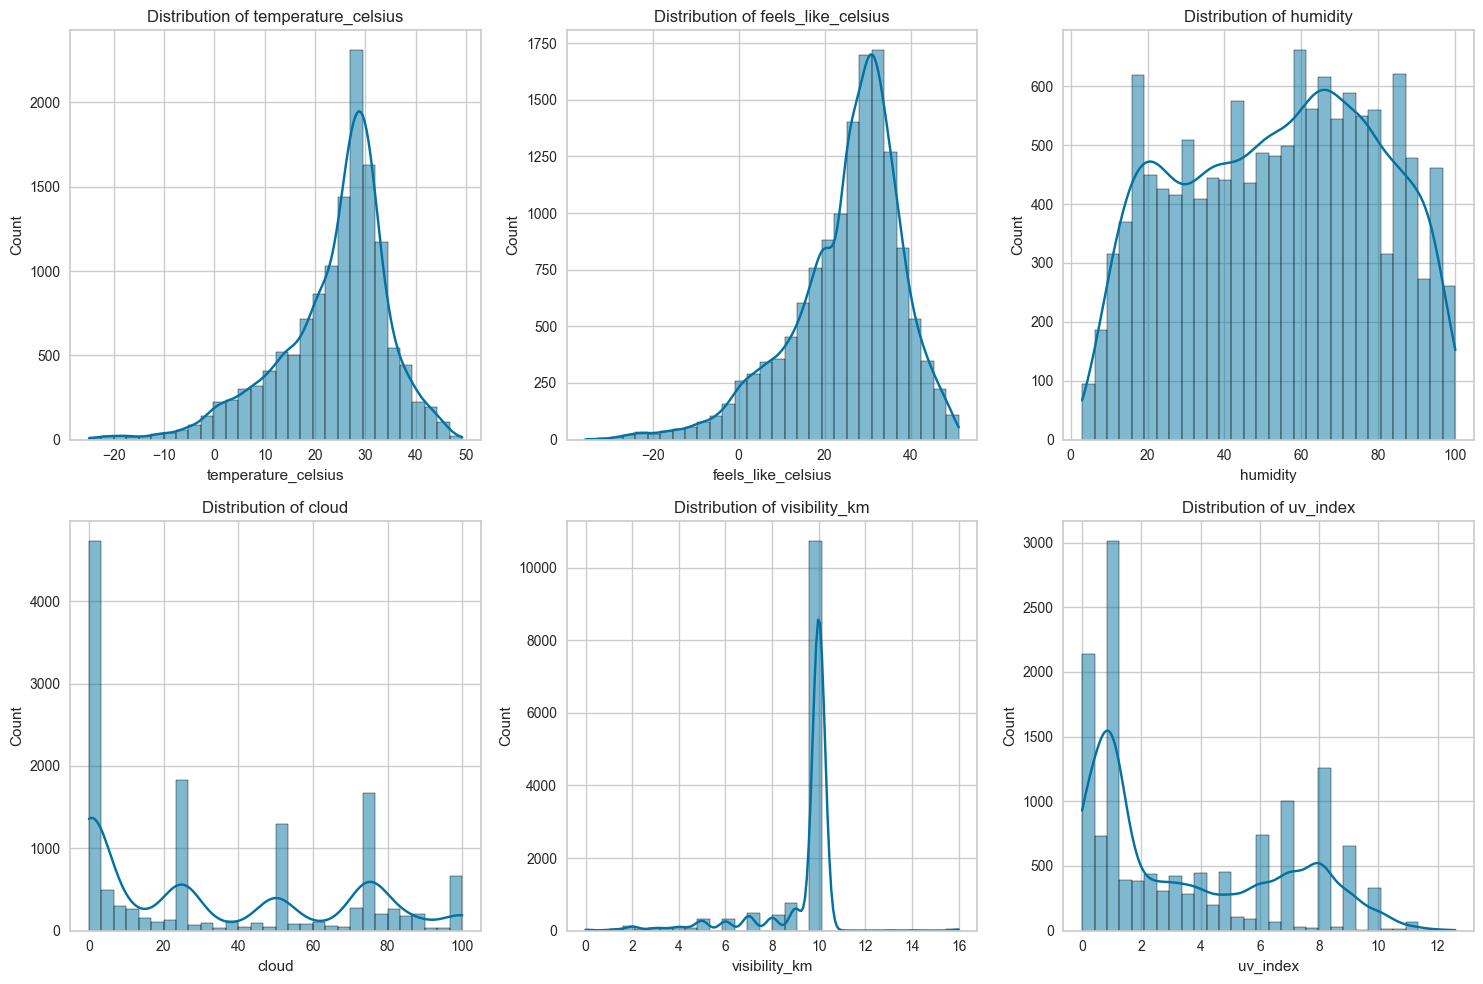

In [13]:
suhu_cuaca = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'cloud', 'visibility_km', 'uv_index']

plt.figure(figsize=(15,10))

for i, column in enumerate(suhu_cuaca, 1):
  plt.subplot(2,3,i)
  sns.histplot(df_asia[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

**Distribusi angin dan TEkanan Udara**

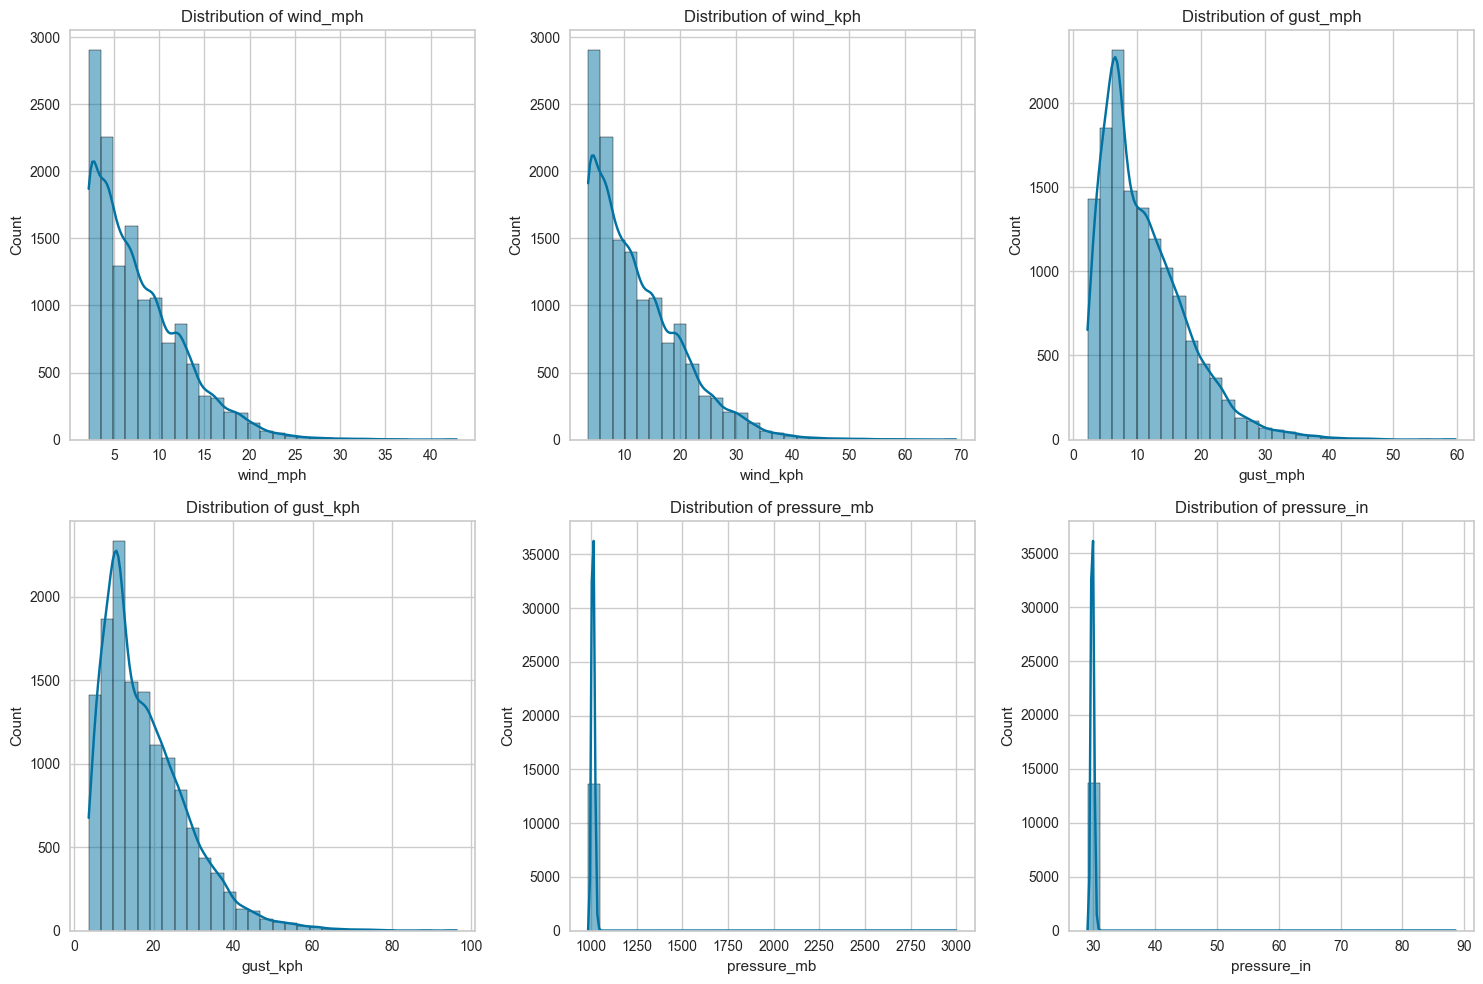

In [14]:
angin_udara = ['wind_mph', 'wind_kph', 'gust_mph', 'gust_kph', 'pressure_mb', 'pressure_in']

plt.figure(figsize=(15,10))

for i, column in enumerate(angin_udara, 1):
  plt.subplot(2,3,i)
  sns.histplot(df_asia[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

**Distribusi Polutan**

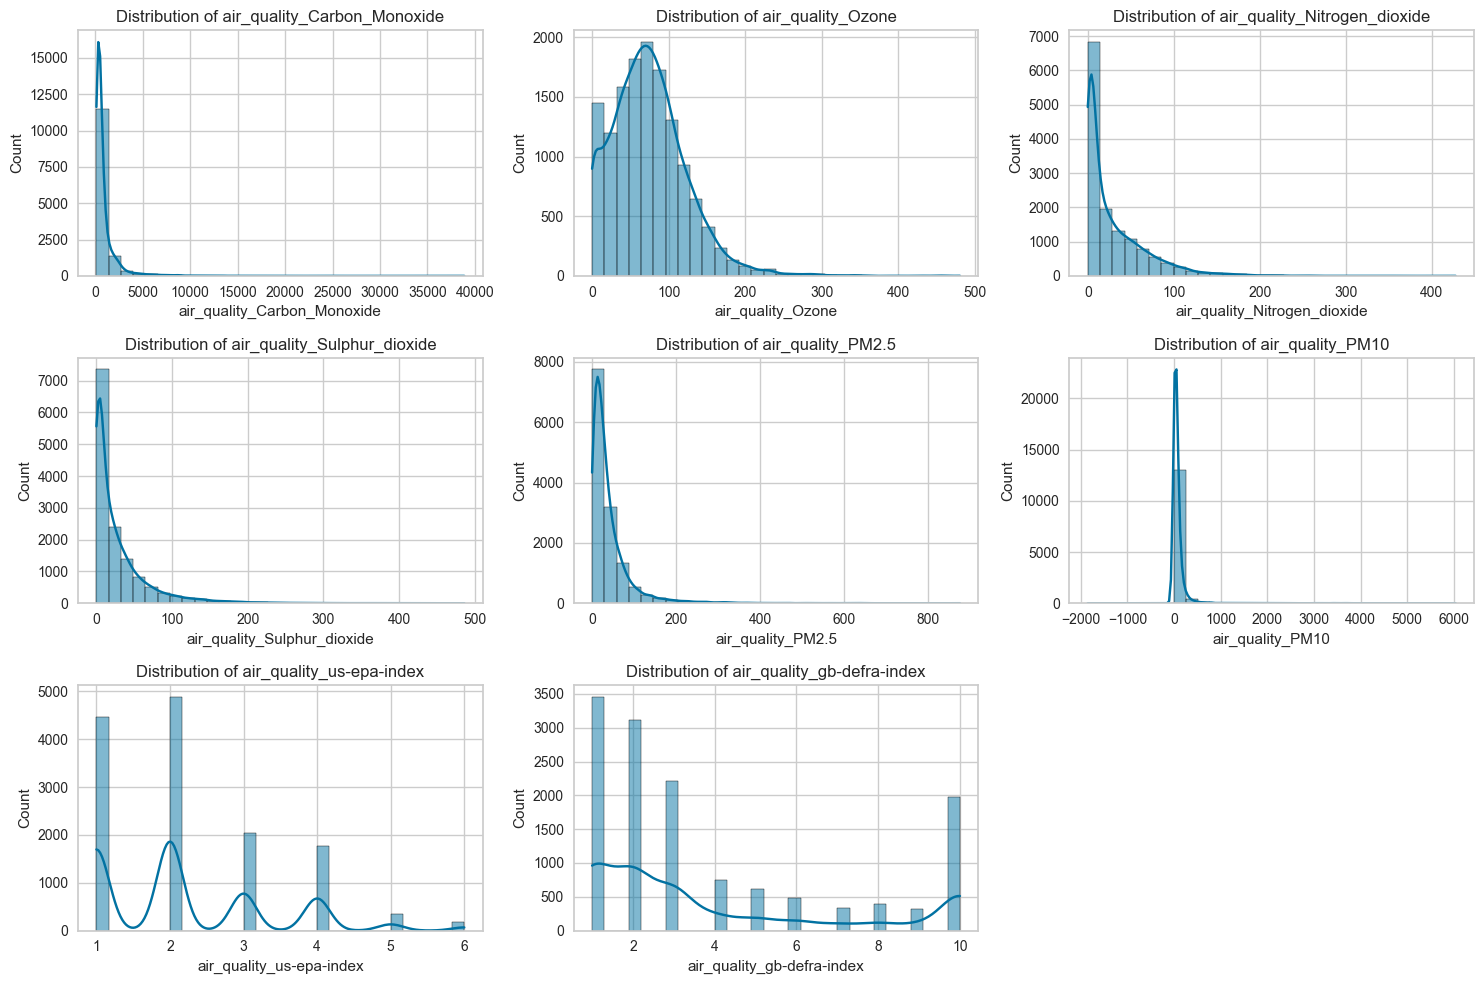

In [15]:
polutan = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',  'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',  'air_quality_us-epa-index', 'air_quality_gb-defra-index']
plt.figure(figsize=(15,10))

for i, column in enumerate(polutan, 1):
  plt.subplot(3,3,i)
  sns.histplot(df_asia[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

**business question 1** <br>
1 Bagaimana tren suhu rata-rata bulanan di Asia?

In [16]:
monthly_trend = df_asia.resample(rule='M', on='last_updated').agg({
    'temperature_celsius' : 'mean'
}).reset_index()

monthly_trend.index = monthly_trend['last_updated'].dt.strftime('%B')
monthly_trend.drop(columns=['last_updated'], inplace=True)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_trend.index = pd.Categorical(monthly_trend.index, categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_index()
monthly_trend

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\2785597916.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df_asia.resample(rule='M', on='last_updated').agg({


,temperature_celsius
January,15.801614
February,16.310817
May,26.660100
June,30.003696
July,30.748759
August,30.356452
September,28.793329
October,25.050437
November,20.860042
December,15.926949


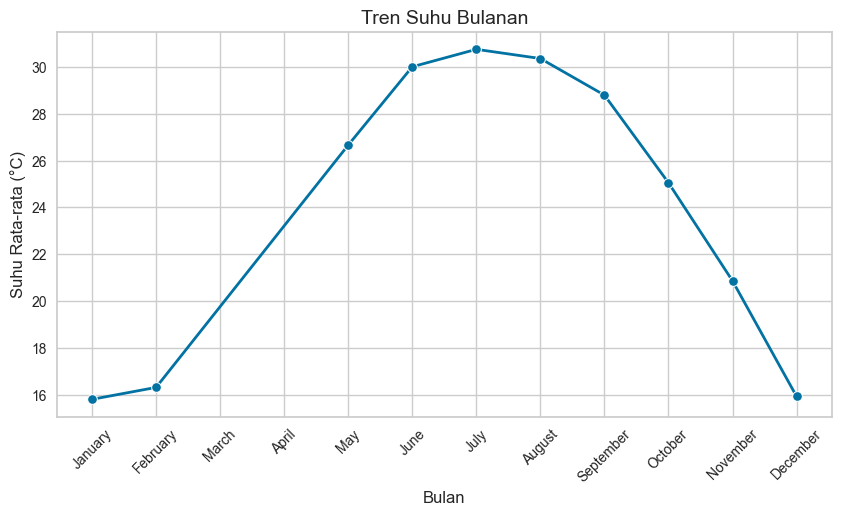

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend['temperature_celsius'], marker='o', linewidth=2, color='b')

plt.title('Tren Suhu Bulanan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Suhu Rata-rata (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**business question 2** <br>
2. Negara mana yang memiliki kualitas udara terburuk?

In [18]:
air_quality = df.groupby('country')['air_quality_us-epa-index'].mean().sort_values(ascending=False).reset_index()
air_quality.head(10)

,country,air_quality_us-epa-index
0,China,4.154386
1,Chile,4.081272
2,Südkorea,4.000000
3,India,3.760563
4,Saudi Arabia,3.422535
5,Kuwait,3.370629
6,Malaysia,3.174825
7,Bahrain,3.174825
8,Bangladesh,3.066667
9,Pakistan,3.056140


C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\3800475035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_air_quality["air_quality_us-epa-index"],


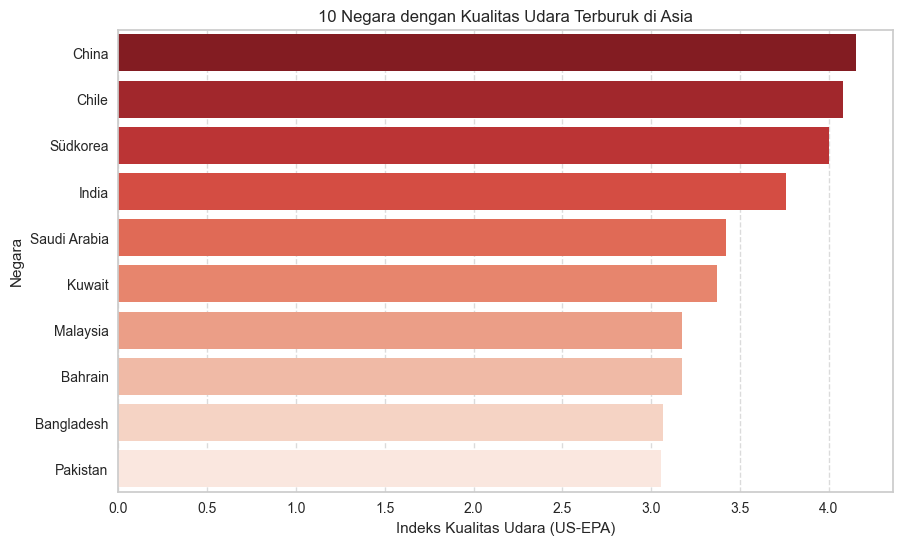

In [19]:
plt.figure(figsize=(10, 6))

top_10_air_quality = air_quality.head(10)

sns.barplot(x=top_10_air_quality["air_quality_us-epa-index"], 
            y=top_10_air_quality["country"], 
            palette="Reds_r")

plt.xlabel("Indeks Kualitas Udara (US-EPA)")
plt.ylabel("Negara")
plt.title("10 Negara dengan Kualitas Udara Terburuk di Asia")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

**business question 3** <br>
3 Negara mana yang memiliki rata rata kecepatan angin trbesar?

In [20]:
wind_speed = df_asia.groupby('country')['wind_kph'].mean().sort_values(ascending=False).reset_index()
wind_speed.head(10)

,country,wind_kph
0,Azerbaijan,23.096842
1,Bahrain,19.946503
2,Qatar,18.692982
3,Kazakhstan,17.942456
4,Jordan,17.905245
5,United Arab Emirates,17.726224
6,Israel,17.104912
7,Iraq,16.889860
8,Japan,16.496853
9,Sri Lanka,16.448772


C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\528854121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wind_speed.head(10), x="wind_kph", y="country", palette="Blues_r"  )


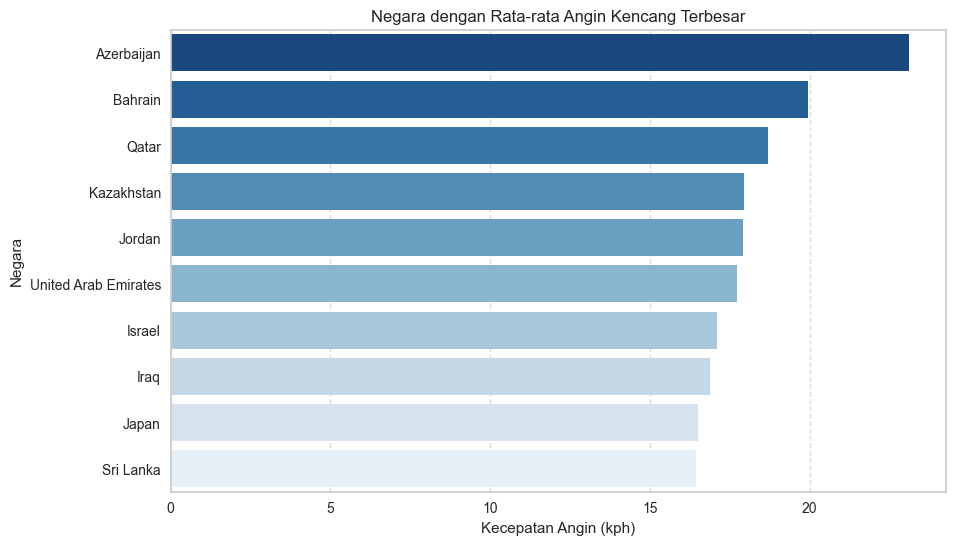

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=wind_speed.head(10), x="wind_kph", y="country", palette="Blues_r"  )

plt.xlabel("Kecepatan Angin (kph)")
plt.ylabel("Negara")
plt.title("Negara dengan Rata-rata Angin Kencang Terbesar")
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()


**Business question 4** <br>
4.Negara mana yang memiliki curah hujan tertinggi?

In [22]:
rainfall = df.groupby('country')['precip_mm'].mean().sort_values(ascending=False).reset_index()
rainfall.head(10)

,country,precip_mm
0,Lao People's Democratic Republic,1.970000
1,Letonia,1.830000
2,Malásia,1.550000
3,Brunei Darussalam,0.580281
4,Malaysia,0.580070
5,USA United States of America,0.530000
6,Sierra Leone,0.521338
7,Sri Lanka,0.508105
8,Guyana,0.470318
9,Indonesia,0.468115


C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\1742842424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rainfall.head(10), x="precip_mm",  y="country", palette="coolwarm")


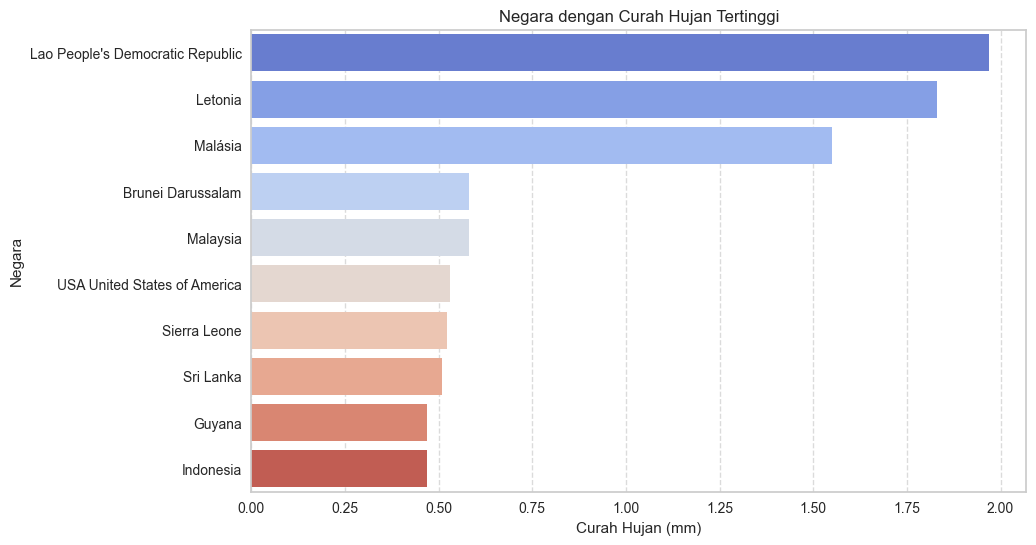

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=rainfall.head(10), x="precip_mm",  y="country", palette="coolwarm")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("Negara")
plt.title("Negara dengan Curah Hujan Tertinggi")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Business question 5**<br>
5. Bagaimana pengaruh fase bulan terhadap suhu rata-rata?

In [24]:
df.groupby('moon_phase')['temperature_celsius'].mean().reset_index()

,moon_phase,temperature_celsius
0,First Quarter,21.991453
1,Full Moon,21.956269
2,Last Quarter,22.045697
3,New Moon,22.645253
4,Waning Crescent,22.129017
5,Waning Gibbous,21.902251
6,Waxing Crescent,22.832917
7,Waxing Gibbous,22.743798


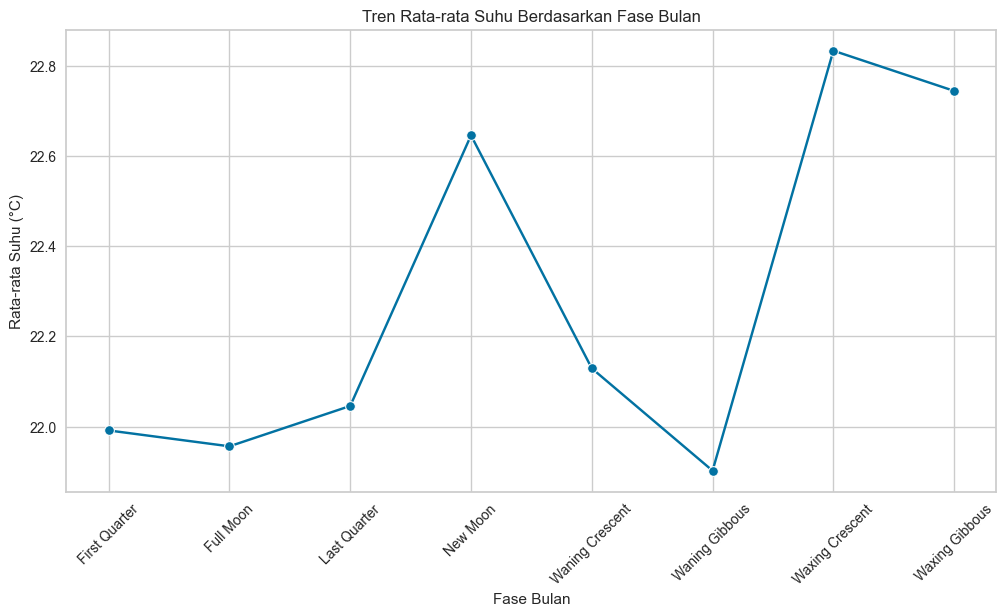

In [25]:
plt.figure(figsize=(12, 6))
avg_temp_per_moon_phase = df.groupby('moon_phase')['temperature_celsius'].mean().reset_index()
sns.lineplot(x='moon_phase', y='temperature_celsius', data=avg_temp_per_moon_phase, marker='o', linestyle='-')
plt.xlabel("Fase Bulan")
plt.ylabel("Rata-rata Suhu (°C)")
plt.title("Tren Rata-rata Suhu Berdasarkan Fase Bulan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Bisnis Question 6**<br>
6. Bagaimana Rata rata Konsentrasi Setiap Polutan

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\2467601596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_means.values, y=pollutant_means.index, palette="Reds_r")


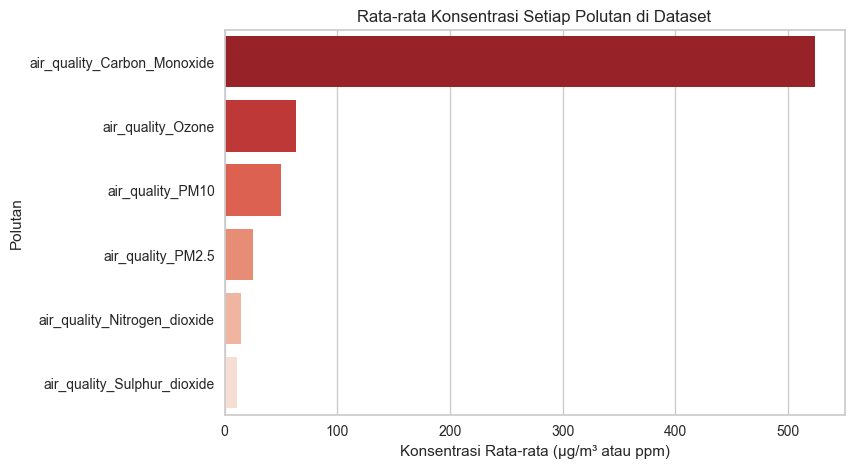

In [26]:
pollutant_means = df[[
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Sulphur_dioxide",
    "air_quality_Nitrogen_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=pollutant_means.values, y=pollutant_means.index, palette="Reds_r")
plt.xlabel("Konsentrasi Rata-rata (µg/m³ atau ppm)")
plt.ylabel("Polutan")
plt.title("Rata-rata Konsentrasi Setiap Polutan di Dataset")
plt.show()

**Bisnis question 7** <br>
7. Bagaimana Tren Rata rata Konsentrasi Polutan per Bulan

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22552\263033241.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pollutants = df.set_index('last_updated').resample('M')[[


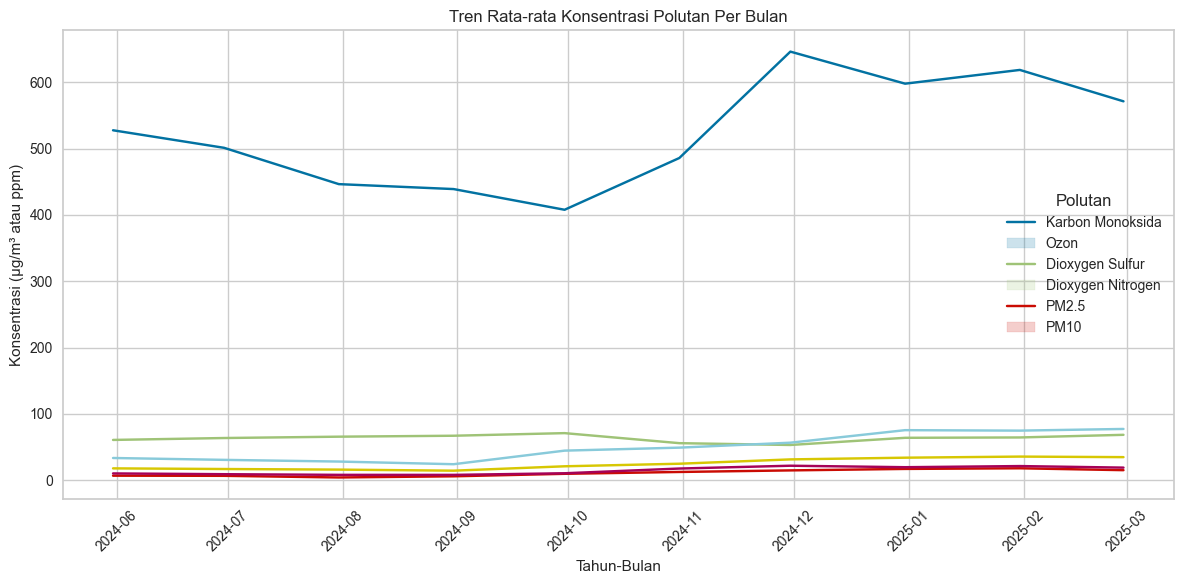

In [27]:
df["last_updated"] = pd.to_datetime(df["last_updated"])
monthly_pollutants = df.set_index('last_updated').resample('M')[[
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Sulphur_dioxide",
    "air_quality_Nitrogen_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pollutants, dashes=False)
plt.title('Tren Rata-rata Konsentrasi Polutan Per Bulan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Konsentrasi (µg/m³ atau ppm)')
plt.xticks(rotation=45)
plt.legend(title='Polutan', labels=[
    "Karbon Monoksida", "Ozon", "Dioxygen Sulfur", "Dioxygen Nitrogen",
    "PM2.5", "PM10"
])
plt.tight_layout()
plt.show()

# Preprocessing

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data/asia_df.csv')
df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1715849100,2024-05-16 12:45:00,19.0,66.2,Partly cloudy,...,0.8,0.9,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
2,Azerbaijan,Baku,40.40,49.88,Asia/Baku,1715849100,2024-05-16 12:45:00,17.0,62.6,Partly cloudy,...,1.9,2.2,1,1,05:23 AM,07:51 PM,12:54 PM,02:10 AM,Waxing Gibbous,55
3,Bahrain,Manama,26.24,50.58,Asia/Bahrain,1715849100,2024-05-16 11:45:00,36.0,96.8,Sunny,...,39.0,114.3,2,4,04:50 AM,06:18 PM,12:10 PM,12:45 AM,Waxing Gibbous,55
4,Bangladesh,Dhaka,23.72,90.41,Asia/Dhaka,1715849100,2024-05-16 14:45:00,38.4,101.2,Partly Cloudy,...,49.7,57.0,3,6,05:16 AM,06:34 PM,12:28 PM,12:58 AM,Waxing Gibbous,55


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  w

In [30]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [31]:
columns_to_drop = ["country", "location_name", "latitude", "longitude", "timezone", "last_updated_epoch", "last_updated", "sunrise", "sunset", "moonrise", "moonset", "moon_phase", "moon_illumination", 'condition_text', 'wind_direction', 'wind_degree', ]
df.drop(columns=columns_to_drop, inplace=True)
df.head(5)

,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,...,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
0,26.6,79.8,8.3,13.3,1012.0,29.89,0.00,0.00,24,30,...,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1
1,19.0,66.2,4.3,6.8,1017.0,30.03,0.13,0.01,40,25,...,6.2,9.9,186.9,103.0,1.0,0.3,0.8,0.9,1,1
2,17.0,62.6,4.3,6.8,1020.0,30.12,0.00,0.00,68,50,...,4.6,7.4,227.0,81.5,7.1,1.8,1.9,2.2,1,1
3,36.0,96.8,13.6,22.0,1007.0,29.74,0.00,0.00,33,0,...,18.1,29.2,397.2,100.1,18.5,9.7,39.0,114.3,2,4
4,38.4,101.2,4.3,6.8,1006.0,29.71,0.00,0.00,31,30,...,4.9,7.9,520.7,188.8,8.7,4.7,49.7,57.0,3,6


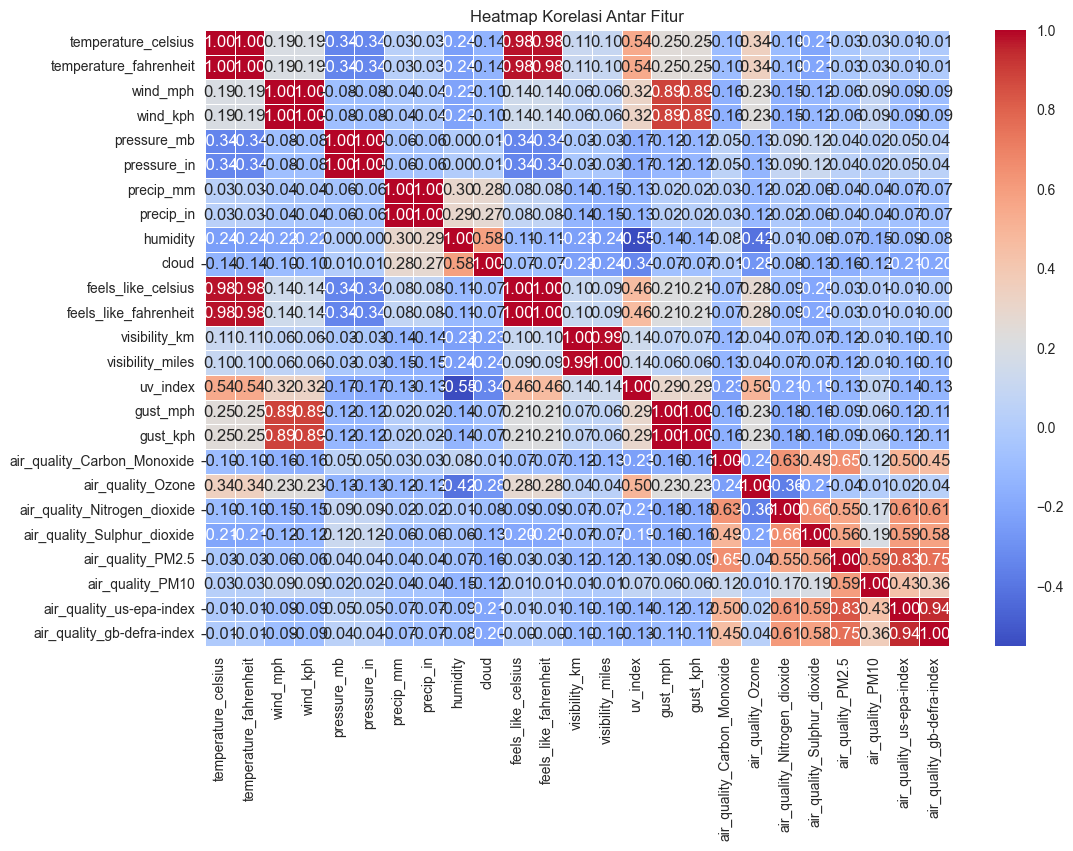

In [32]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [33]:
column_multikolinearitas = ['gust_mph', 'feels_like_fahrenheit', 'temperature_fahrenheit', 'air_quality_gb-defra-index', 'wind_mph', 'pressure_in', 'visibility_miles', 'precip_in', 'feels_like_celsius', 'precip_mm', 'air_quality_us-epa-index']
df.drop(columns=column_multikolinearitas, inplace=True)
df.head(5)

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10
0,26.6,13.3,1012.0,24,30,10.0,7.0,15.3,277.0,103.0,1.1,0.2,8.4,26.6
1,19.0,6.8,1017.0,40,25,10.0,4.0,9.9,186.9,103.0,1.0,0.3,0.8,0.9
2,17.0,6.8,1020.0,68,50,10.0,5.0,7.4,227.0,81.5,7.1,1.8,1.9,2.2
3,36.0,22.0,1007.0,33,0,10.0,8.0,29.2,397.2,100.1,18.5,9.7,39.0,114.3
4,38.4,6.8,1006.0,31,30,10.0,9.0,7.9,520.7,188.8,8.7,4.7,49.7,57.0


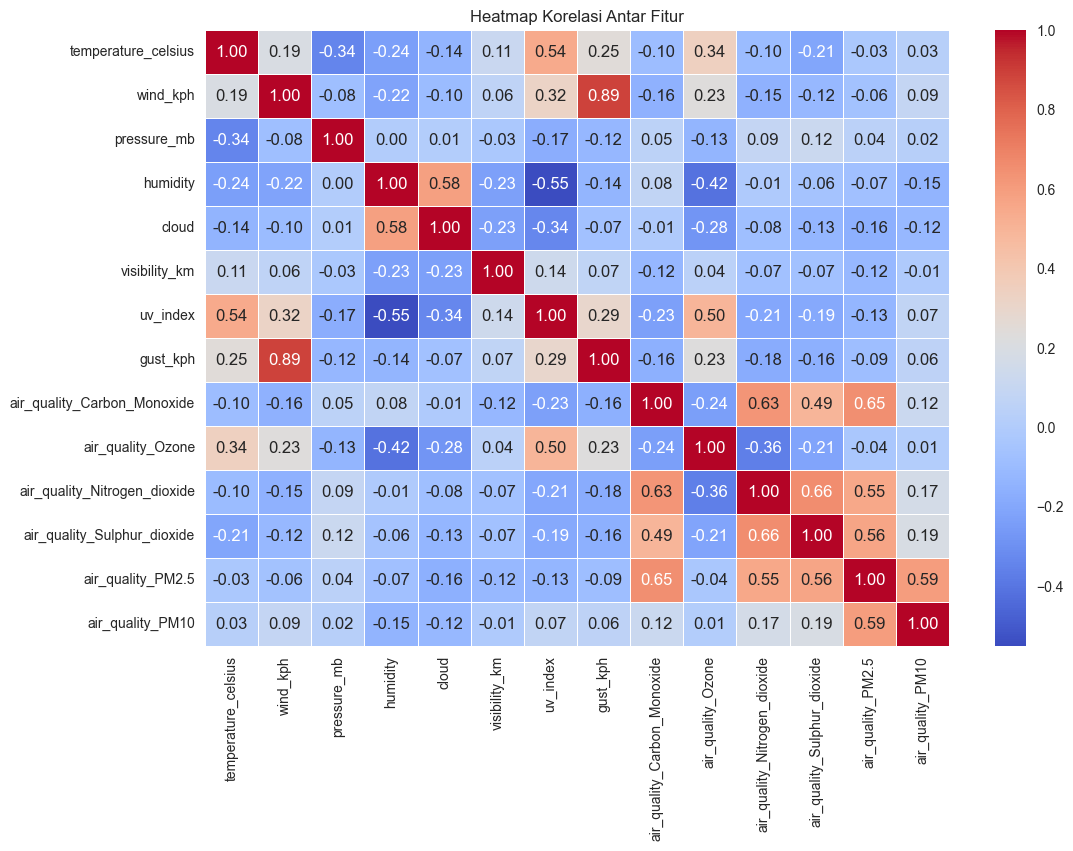

In [34]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

## Feature Engineering

In [35]:
df['pm_ratio'] = df['air_quality_PM2.5'] / (df['air_quality_PM10'] + 1e-5)

In [36]:
def categorize_wind(speed):
    if speed < 5:
        return "Low"
    elif 5 <= speed <= 15:
        return "Medium"
    else:
        return "High"

df['wind_condition'] = df['wind_kph'].apply(categorize_wind)

In [37]:
df['humidity_temperature_ratio'] = df['humidity'] / (df['temperature_celsius'] + 1e-5)

In [38]:
df['dew_point'] = df['temperature_celsius'] - ((100 - df['humidity']) / 5)

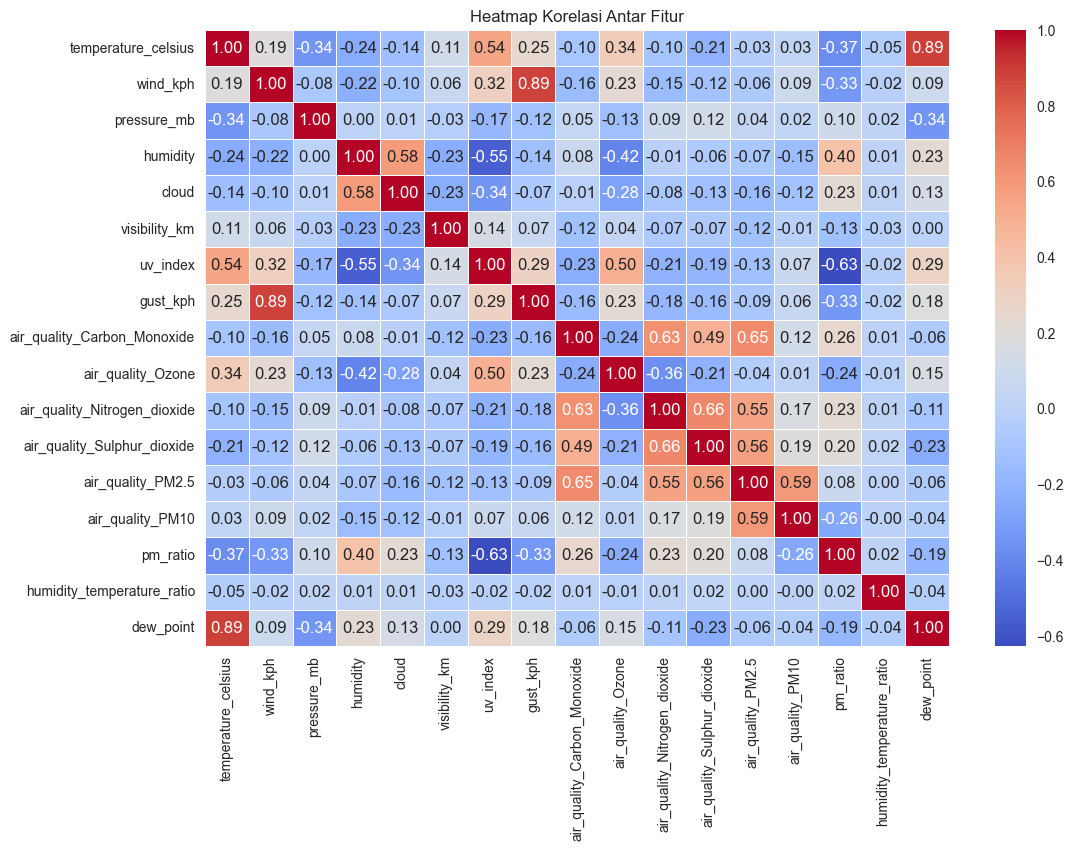

In [39]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [40]:
df.head()

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
0,26.6,13.3,1012.0,24,30,10.0,7.0,15.3,277.0,103.0,1.1,0.2,8.4,26.6,0.315789,Medium,0.902255,11.4
1,19.0,6.8,1017.0,40,25,10.0,4.0,9.9,186.9,103.0,1.0,0.3,0.8,0.9,0.888879,Medium,2.105262,7.0
2,17.0,6.8,1020.0,68,50,10.0,5.0,7.4,227.0,81.5,7.1,1.8,1.9,2.2,0.863632,Medium,3.999998,10.6
3,36.0,22.0,1007.0,33,0,10.0,8.0,29.2,397.2,100.1,18.5,9.7,39.0,114.3,0.341207,High,0.916666,22.6
4,38.4,6.8,1006.0,31,30,10.0,9.0,7.9,520.7,188.8,8.7,4.7,49.7,57.0,0.871930,Medium,0.807291,24.6


In [41]:
column = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'pm_ratio', 'wind_condition', 'humidity_temperature_ratio', 'dew_point']
df = df[column]

In [42]:
df = df[df['air_quality_PM10'] >= 0]

## Standardilisasi & Label Encoder

In [43]:
numeric_features = df.select_dtypes(include='number').columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [44]:
# with open("scaler.pkl", "wb") as f:
#     pickle.dump(scaler, f)

In [45]:
category_features = df.select_dtypes(include='object').columns
categories = [['Low', 'Medium', 'High']]
encoder = OrdinalEncoder(categories=categories)
df[category_features] = encoder.fit_transform(df[category_features])

In [46]:
# with open("encoder.pkl", "wb") as f:
#     pickle.dump(encoder, f)

In [47]:
df

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
0,-0.398371,0.578599,-0.697199,-0.772190,-0.600001,-0.225669,-1.437955,1.0,-0.021714,-0.308507
1,-0.451405,0.578599,-0.694714,-0.774898,-0.740402,-0.321482,0.944264,1.0,-0.021706,-0.714013
2,-0.427802,0.136487,-0.657445,-0.609713,-0.720081,-0.316635,0.839319,1.0,-0.021694,-0.382235
3,-0.327621,0.518966,-0.461161,-0.301006,-0.034701,0.101289,-1.332298,2.0,-0.021714,0.723690
4,-0.254929,2.342935,-0.585391,-0.566385,0.162969,-0.112333,0.873809,1.0,-0.021715,0.908011
...,...,...,...,...,...,...,...,...,...,...
13645,-0.272852,-0.120555,-0.224130,0.941401,-0.269873,-0.184827,0.157083,0.0,-0.021684,-1.580321
13646,-0.362143,0.825359,-0.444763,-0.386171,-0.228861,-0.162756,-0.026598,2.0,-0.021704,-0.280859
13647,-0.257607,0.085079,-0.555079,-0.496385,-0.649233,-0.302767,1.276265,1.0,-0.021617,-1.617185
13648,0.783398,-0.634638,0.722752,0.199964,1.052762,0.042776,1.374976,0.0,-0.021690,-0.197914


# Modeling

## K-Means

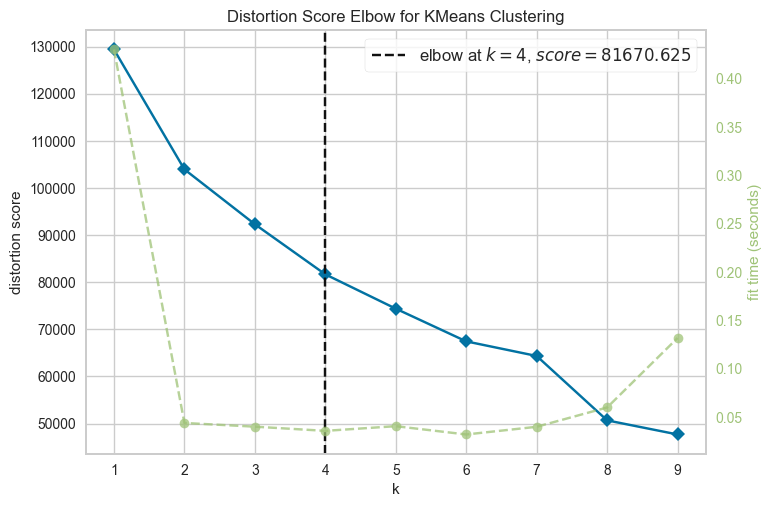

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [49]:
k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
kmeans.fit(df)
labels_kmeans = kmeans.labels_

In [50]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("n_clusters={0}, silhouette score {1}".format(num_clusters, silhouette_avg))

n_clusters=2, silhouette score 0.4049724178888042
n_clusters=3, silhouette score 0.18182692049854512
n_clusters=4, silhouette score 0.18511095947321654
n_clusters=5, silhouette score 0.19627727591218536
n_clusters=6, silhouette score 0.1961049395444156
n_clusters=7, silhouette score 0.20595917452514237
n_clusters=8, silhouette score 0.20566721429128643


In [51]:
sil_score = silhouette_score(df_without_outlier, labels_kmeans)
print(f'Silhouette Score: {sil_score:.2f}')

NameError: name 'df_without_outlier' is not defined

In [ ]:
dbi = davies_bouldin_score(df, labels_kmeans)
print(f"Davies-Bouldin Index (K-Means): {dbi:.2f}")

Davies-Bouldin Index (K-Means): 1.26


In [ ]:
ch_index = calinski_harabasz_score(df, labels_kmeans)
print(f"Calinski-Harabasz Index (K-Means): {ch_index:.2f}")


Calinski-Harabasz Index (K-Means): 2873.02


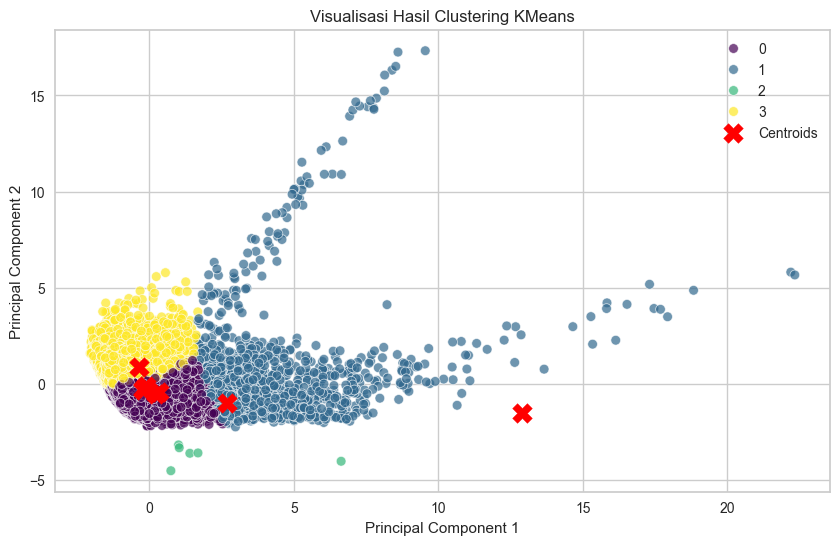

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_kmeans, palette="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Visualisasi Hasil Clustering KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## DBSCAN

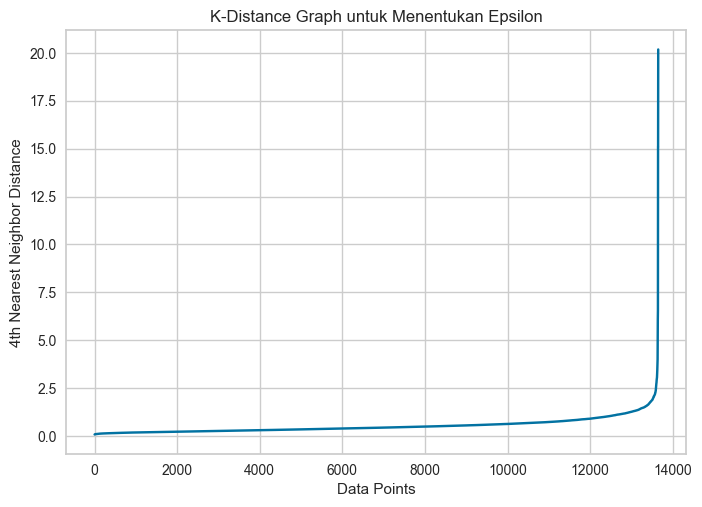

In [ ]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df)
distances, indices = neigh.kneighbors(df)
distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Graph untuk Menentukan Epsilon")
plt.show()

In [ ]:
db = DBSCAN(eps=2.3, min_samples=20)
db.fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_dbscan = db.labels_

['y', 'b', 'g', 'r']


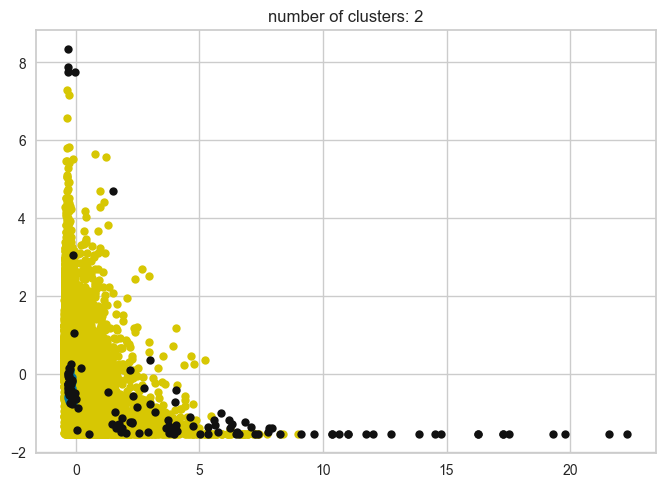

In [ ]:
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
unique_labels = set(labels_dbscan)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels_dbscan == k)
    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
def analyze_clusters_dbscan(X, labels, feature_names):
    unique_clusters = set(labels)
    
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in unique_clusters:
        if cluster_id == -1:
            print('--- Cluster Noise (Outlier) ---')
        else:
            print(f'--- Cluster {cluster_id} ---')

        cluster_data = X[labels == cluster_id]
        
        if len(cluster_data) == 0:
            print('Cluster kosong.\n')
            continue

        mean_values = cluster_data.mean(axis=0)

        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters_dbscan(df, labels_dbscan, numeric_features)


Analisis Karakteristik Setiap Cluster:

--- Cluster 0 ---
air_quality_Carbon_Monoxide: -0.04
air_quality_Ozone: 0.01
air_quality_Sulphur_dioxide: -0.03
air_quality_Nitrogen_dioxide: -0.02
air_quality_PM2.5: -0.05
air_quality_PM10: -0.05
pm_ratio: 0.00
humidity_temperature_ratio: 1.15
dew_point: -0.02


--- Cluster 1 ---
air_quality_Carbon_Monoxide: -0.21
air_quality_Ozone: -0.34
air_quality_Sulphur_dioxide: 0.81
air_quality_Nitrogen_dioxide: 0.66
air_quality_PM2.5: 4.67
air_quality_PM10: 11.58
pm_ratio: -2.37
humidity_temperature_ratio: 1.79
dew_point: -0.02


--- Cluster Noise (Outlier) ---
air_quality_Carbon_Monoxide: 4.55
air_quality_Ozone: -0.60
air_quality_Sulphur_dioxide: 3.32
air_quality_Nitrogen_dioxide: 2.60
air_quality_PM2.5: 5.44
air_quality_PM10: 4.55
pm_ratio: -0.02
humidity_temperature_ratio: 0.99
dew_point: 2.43




In [ ]:
sil_score = silhouette_score(df, labels_dbscan)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.74


In [ ]:
dbi = davies_bouldin_score(df, labels_dbscan)
print(f"Davies-Bouldin Index (DBSCAN): {dbi:.2f}")

Davies-Bouldin Index (DBSCAN): 1.41


In [ ]:
ch_index = calinski_harabasz_score(df, labels_dbscan)
print(f"Calinski-Harabasz Index (DBSCAN): {ch_index:.2f}")

Calinski-Harabasz Index (DBSCAN): 825.10


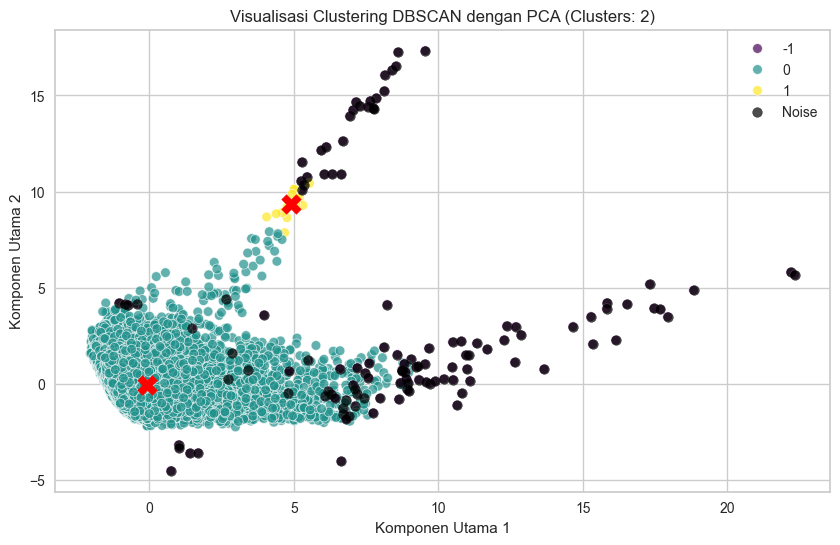

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

reduced_data = pca.fit_transform(df)
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels_dbscan 

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster', 
    palette='viridis', data=reduced_df, alpha=0.7
)
plt.scatter(
    reduced_df[reduced_df['cluster'] == -1]['PCA1'], 
    reduced_df[reduced_df['cluster'] == -1]['PCA2'], 
    color='black', label='Noise', alpha=0.7
)

for cluster_id in set(labels_dbscan):
    if cluster_id != -1: 
        cluster_data = reduced_df[reduced_df['cluster'] == cluster_id]
        centroid = cluster_data[['PCA1', 'PCA2']].mean() 
        plt.scatter(centroid['PCA1'], centroid['PCA2'], color='red', s=200, marker='X')

plt.title(f'Visualisasi Clustering DBSCAN dengan PCA (Clusters: {len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)})')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.show()

## Hierarchial

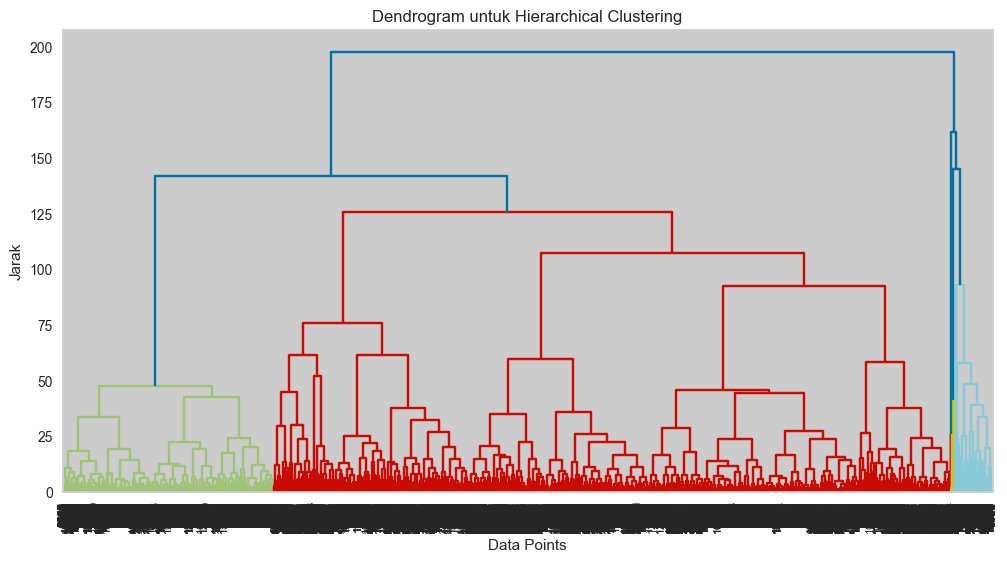

In [ ]:
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(df, method='ward')
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogram untuk Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Jarak")
plt.show()

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward' )
agg_clustering.fit(df)
labels_hieararchial = agg_clustering.labels_

In [ ]:
def analyze_clusters_hierarchical(X, labels, feature_names):
    unique_clusters = np.unique(labels)
    
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in unique_clusters:
        print(f'--- Cluster {cluster_id} ---')

        cluster_data = X[labels == cluster_id]
        
        if len(cluster_data) == 0:
            print('Cluster kosong.\n')
            continue

        mean_values = cluster_data.mean(axis=0)

        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters_hierarchical(df.values, labels_hieararchial, numeric_features)

Analisis Karakteristik Setiap Cluster:

--- Cluster 0 ---
air_quality_Carbon_Monoxide: -0.13
air_quality_Ozone: 0.04
air_quality_Sulphur_dioxide: -0.10
air_quality_Nitrogen_dioxide: -0.13
air_quality_PM2.5: -0.12
air_quality_PM10: -0.07
pm_ratio: -0.02
humidity_temperature_ratio: 1.16
dew_point: -0.02


--- Cluster 1 ---
air_quality_Carbon_Monoxide: 3.21
air_quality_Ozone: -1.02
air_quality_Sulphur_dioxide: 2.34
air_quality_Nitrogen_dioxide: 2.99
air_quality_PM2.5: 2.21
air_quality_PM10: 0.42
pm_ratio: 0.58
humidity_temperature_ratio: 0.91
dew_point: 0.01


--- Cluster 2 ---
air_quality_Carbon_Monoxide: 0.24
air_quality_Ozone: -0.53
air_quality_Sulphur_dioxide: 0.97
air_quality_Nitrogen_dioxide: 0.54
air_quality_PM2.5: -0.06
air_quality_PM10: -0.16
pm_ratio: 0.82
humidity_temperature_ratio: 0.33
dew_point: 46.54


--- Cluster 3 ---
air_quality_Carbon_Monoxide: -0.23
air_quality_Ozone: -0.30
air_quality_Sulphur_dioxide: 0.79
air_quality_Nitrogen_dioxide: 0.55
air_quality_PM2.5: 5.70
air

In [ ]:
sil_score = silhouette_score(df, labels_hieararchial)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5436


In [ ]:
dbi = davies_bouldin_score(df, labels_hieararchial)
print(f"Davies-Bouldin Index: {dbi:.2f}")

Davies-Bouldin Index: 0.74


In [ ]:
ch_index = calinski_harabasz_score(df, labels_hieararchial)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Calinski-Harabasz Index: 2264.46


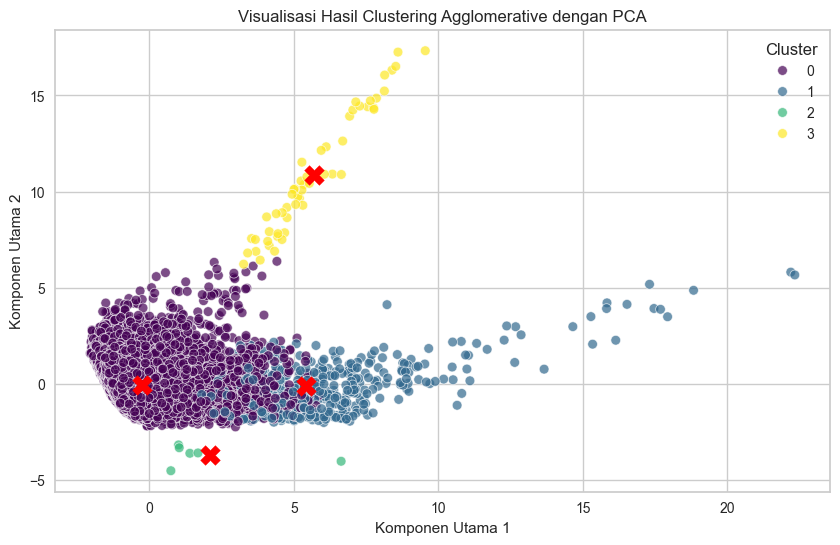

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

reduced_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels_hieararchial 

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster', 
    palette='viridis', data=reduced_df, alpha=0.7
)

centroids = reduced_df.groupby('cluster')[['PCA1', 'PCA2']].mean()
for cluster_id, centroid in centroids.iterrows():
    plt.scatter(centroid['PCA1'], centroid['PCA2'], color='red', s=200, marker='X')

plt.title(f'Visualisasi Hasil Clustering Agglomerative dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

# Simpan Model

In [ ]:
# with open('KMeans_Kelompok2.pkl', 'wb') as file:
#     pickle.dump(kmeans, file)

In [ ]:
# with open('DBSCAN_Kelompok2.pkl', 'wb') as file:
#     pickle.dump(db, file)

In [ ]:
# with open('agg_clustering_Kelompok2.pkl', 'wb') as file:
#     pickle.dump(agg_clustering, file)

In [ ]:
# Membuat centroid hasil hierarchial
n_clusters = len(set(labels_hieararchial))
centroids = np.array([df[labels_hieararchial == i].mean(axis=0) for i in range(n_clusters)])
# np.save("centroids.npy", centroids)

# Mentyimpan data dengan cluster Hierarchial

In [ ]:
df_reserved = pd.DataFrame(scaler.inverse_transform(df[numeric_features]), columns=numeric_features)
df_reserved['cluster'] = labels_hieararchial
df_reserved.head()

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,humidity_temperature_ratio,dew_point,cluster
0,277.0,103.0,0.2,1.1,8.4,26.6,0.315789,0.902255,11.4,0
1,186.9,103.0,0.3,1.0,0.8,0.9,0.888879,2.105262,7.0,0
2,227.0,81.5,1.8,7.1,1.9,2.2,0.863632,3.999998,10.6,0
3,397.2,100.1,9.7,18.5,39.0,114.3,0.341207,0.916666,22.6,0
4,520.7,188.8,4.7,8.7,49.7,57.0,0.871930,0.807291,24.6,0


In [ ]:
# df_reserved.to_csv('Data dengan label hierarchial.csv', index=False)

# Mencoba Resampling untuk deploy

In [50]:
df['cluster'] = labels_hieararchial
df['cluster'].value_counts()

cluster
0    13042
1      548
3       53
2        6
Name: count, dtype: int64

In [ ]:
category_features = df.select_dtypes(include='object')
numeric_features = df.select_dtypes(include='number')


smote = SMOTE(sampling_strategy='auto', random_state=42)  
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)  

X_resampled, y_resampled = smote.fit_resample(df, df['cluster'])
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

df_resampled = pd.DataFrame(X_resampled, columns=numeric_features.columns)

df_resampled = pd.concat([df_resampled, category_features.iloc[:len(df_resampled)].reset_index(drop=True)], axis=1)

df_resampled

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point,cluster
0,-0.398371,0.578599,-0.697199,-0.772190,-0.600001,-0.225669,-1.437955,1.000000,-0.021714,-0.308507,0
1,-0.451405,0.578599,-0.694714,-0.774898,-0.740402,-0.321482,0.944264,1.000000,-0.021706,-0.714013,0
2,-0.427802,0.136487,-0.657445,-0.609713,-0.720081,-0.316635,0.839319,1.000000,-0.021694,-0.382235,0
3,-0.327621,0.518966,-0.461161,-0.301006,-0.034701,0.101289,-1.332298,2.000000,-0.021714,0.723690,0
4,-0.254929,2.342935,-0.585391,-0.566385,0.162969,-0.112333,0.873809,1.000000,-0.021715,0.908011,0
...,...,...,...,...,...,...,...,...,...,...,...
48743,-0.121915,-0.545170,0.609109,0.346293,5.027195,12.311867,-2.366749,2.000000,-0.021708,-1.220276,3
45735,-0.298886,-0.292783,0.683755,0.622714,5.366701,13.515737,-2.379498,1.941983,-0.021713,-0.588605,3
48357,-0.201279,-0.105393,0.579117,0.420901,3.392788,9.101083,-2.381422,1.956216,-0.021714,-1.187194,3
48888,-0.140201,-0.294048,0.780780,0.693102,3.401535,8.727073,-2.365326,1.000000,-0.021712,-1.046367,3


In [61]:
df_resampled['cluster'].value_counts()

cluster
0    13042
1    13042
2    13042
3    13042
Name: count, dtype: int64

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward' )
agg_clustering.fit(df_resampled)
labels_hieararchial = agg_clustering.labels_

In [ ]:
sil_score = silhouette_score(df_resampled, labels_hieararchial)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.6139


In [ ]:
dbi = davies_bouldin_score(df_resampled, labels_hieararchial)
print(f"Davies-Bouldin Index: {dbi:.2f}")

Davies-Bouldin Index: 0.59


In [ ]:
ch_index = calinski_harabasz_score(df_resampled, labels_hieararchial)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Calinski-Harabasz Index: 395295.61


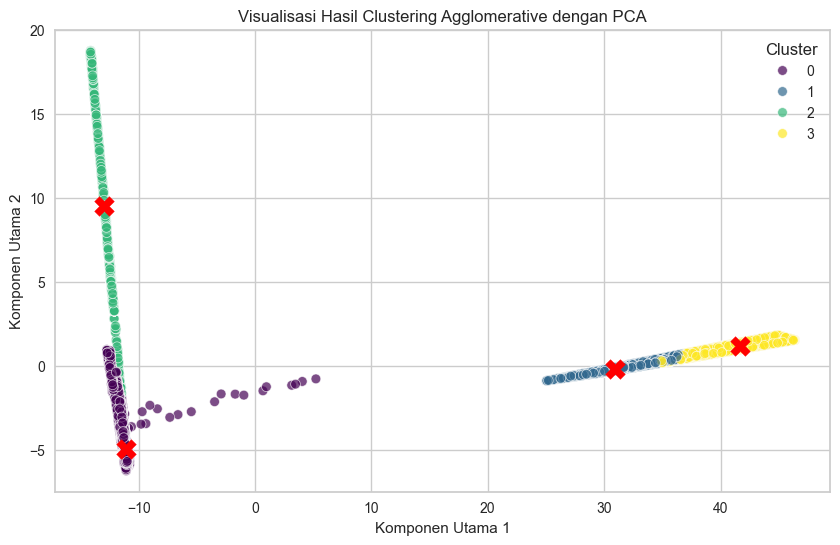

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_resampled)

reduced_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
reduced_df['cluster'] = labels_hieararchial 

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster', 
    palette='viridis', data=reduced_df, alpha=0.7
)

centroids = reduced_df.groupby('cluster')[['PCA1', 'PCA2']].mean()
for cluster_id, centroid in centroids.iterrows():
    plt.scatter(centroid['PCA1'], centroid['PCA2'], color='red', s=200, marker='X')

plt.title(f'Visualisasi Hasil Clustering Agglomerative dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_resampled.describe()

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point
count,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000
mean,0.765362,-0.450910,0.983746,0.975015,1.914193,3.430697,-0.238819,-0.149595,11.608225,-0.762760
std,2.100776,0.743173,1.653655,1.391540,2.807246,6.207600,1.391825,1.068973,20.365386,1.090186
min,-0.493137,-1.539426,-0.702168,-0.801977,-0.745944,-0.322973,-2.455401,-1.661069,-0.027899,-4.538670
25%,-0.274623,-0.943903,-0.195131,0.023948,-0.172584,-0.172195,-2.257645,-1.111291,-0.021712,-1.762563
50%,-0.143087,-0.456379,0.624027,0.638272,0.426021,-0.005504,0.402548,-0.216721,-0.021704,-0.889117
75%,1.056943,-0.111157,1.378374,1.627731,3.813695,7.222762,0.878237,1.227627,21.635237,0.297175
max,22.323146,8.345377,11.377478,10.779923,15.407586,22.182993,1.406172,1.227627,57.730166,1.562350


In [ ]:
df.describe()

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10,pm_ratio,wind_condition,humidity_temperature_ratio,dew_point,cluster
count,1.364900e+04,1.364900e+04,1.364900e+04,1.364900e+04,1.364900e+04,1.364900e+04,1.364900e+04,13649.000000,1.364900e+04,1.364900e+04,13649.000000
mean,-1.665863e-17,-9.162248e-17,-3.331727e-17,-3.331727e-17,6.663453e-17,4.164658e-17,-1.332691e-16,1.150048,-4.164658e-18,3.331727e-17,0.052678
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,0.692379,1.000037e+00,1.000037e+00,0.272187
min,-4.931367e-01,-1.539426e+00,-7.021678e-01,-8.019770e-01,-7.459440e-01,-3.229731e-01,-2.455401e+00,0.000000,-2.789917e-02,-4.538670e+00,0.000000
25%,-3.958993e-01,-7.148355e-01,-6.286235e-01,-7.099067e-01,-5.371895e-01,-2.551210e-01,-7.468121e-01,1.000000,-2.171274e-02,-6.034201e-01,0.000000
50%,-2.824165e-01,-7.942796e-02,-3.666221e-01,-4.162296e-01,-2.903790e-01,-1.745933e-01,9.945465e-02,1.000000,-2.170552e-02,2.905359e-01,0.000000
75%,-1.477839e-02,5.580359e-01,2.221047e-01,4.053623e-01,1.470817e-01,-1.722875e-02,8.738975e-01,2.000000,-2.169843e-02,8.250663e-01,0.000000
max,2.232315e+01,8.345377e+00,1.137748e+01,1.077992e+01,1.540759e+01,2.218299e+01,1.406172e+00,2.000000,5.773017e+01,1.562350e+00,3.000000


Jumlah Data Asli: 13649
Jumlah Data Sintetis: 38519

📊 Statistik Data Asli:
        air_quality_Carbon_Monoxide  air_quality_Ozone  \
count                 1.364900e+04       1.364900e+04   
mean                 -1.665863e-17      -9.162248e-17   
std                   1.000037e+00       1.000037e+00   
min                  -4.931367e-01      -1.539426e+00   
25%                  -3.958993e-01      -7.148355e-01   
50%                  -2.824165e-01      -7.942796e-02   
75%                  -1.477839e-02       5.580359e-01   
max                   2.232315e+01       8.345377e+00   

       air_quality_Sulphur_dioxide  air_quality_Nitrogen_dioxide  \
count                 1.364900e+04                  1.364900e+04   
mean                 -3.331727e-17                 -3.331727e-17   
std                   1.000037e+00                  1.000037e+00   
min                  -7.021678e-01                 -8.019770e-01   
25%                  -6.286235e-01                 -7.099067e-01   
5

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


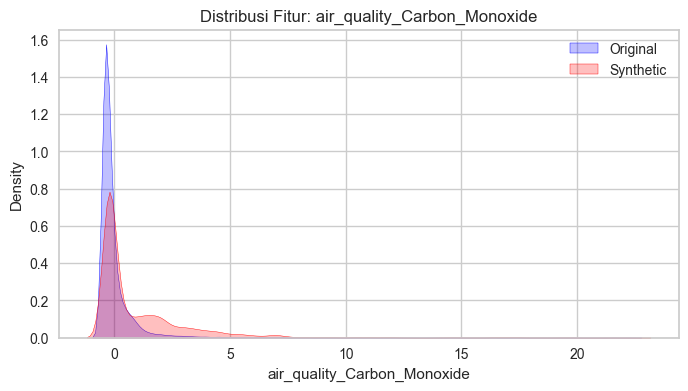

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


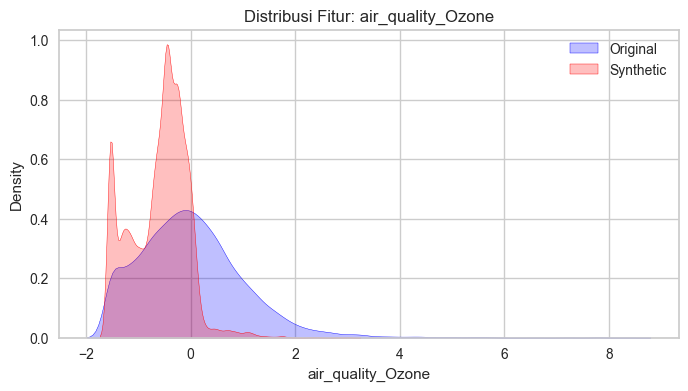

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


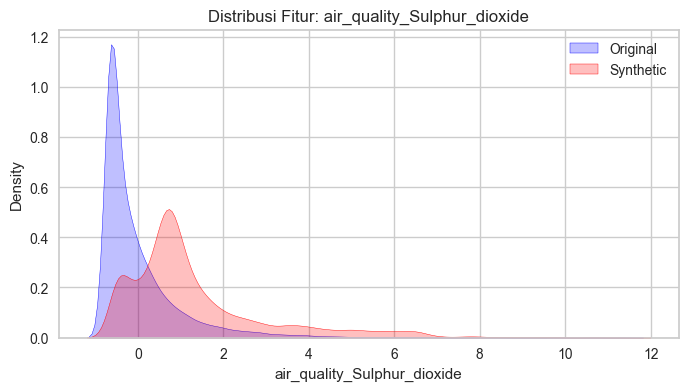

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


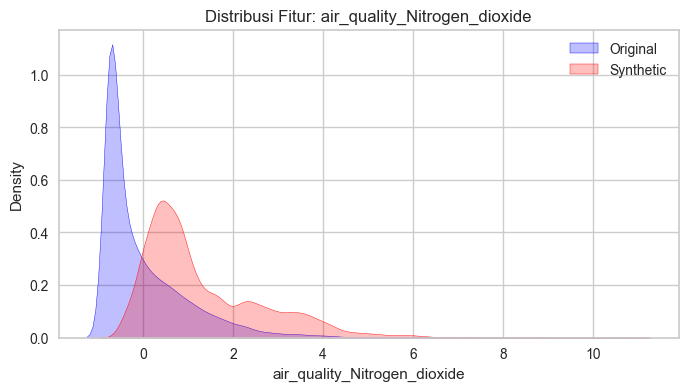

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


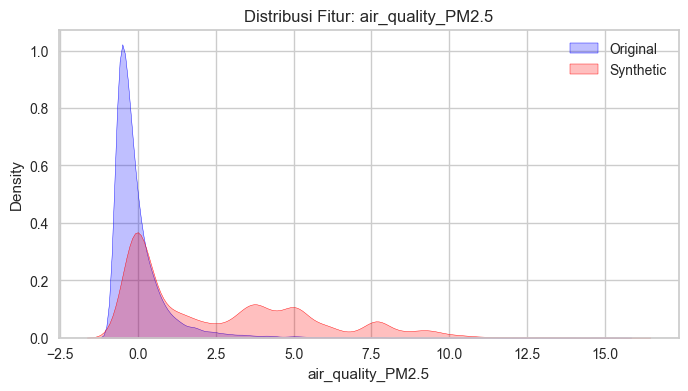

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


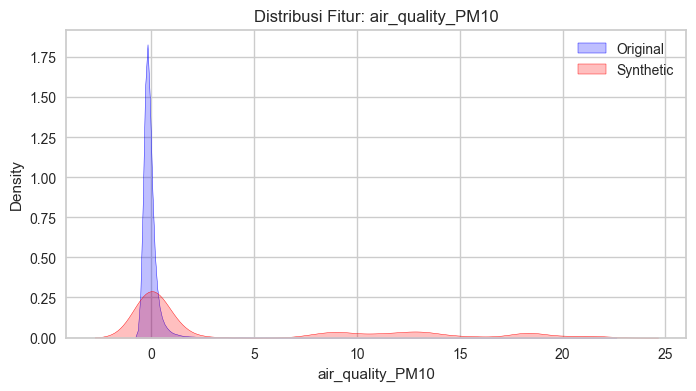

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


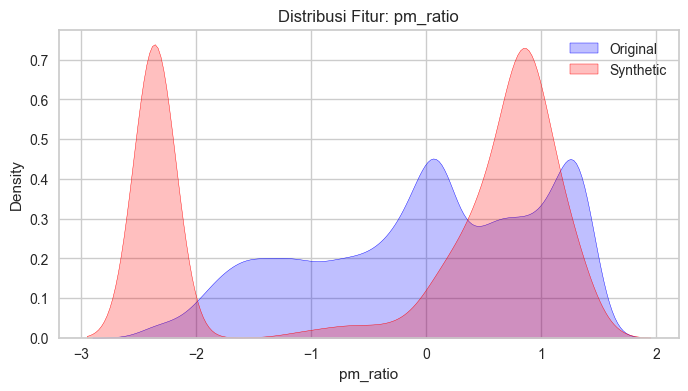

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


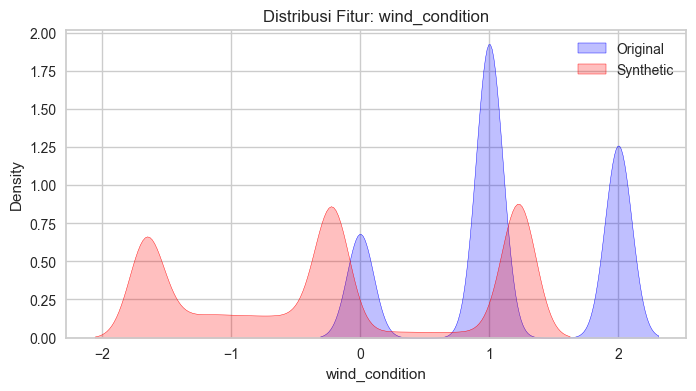

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


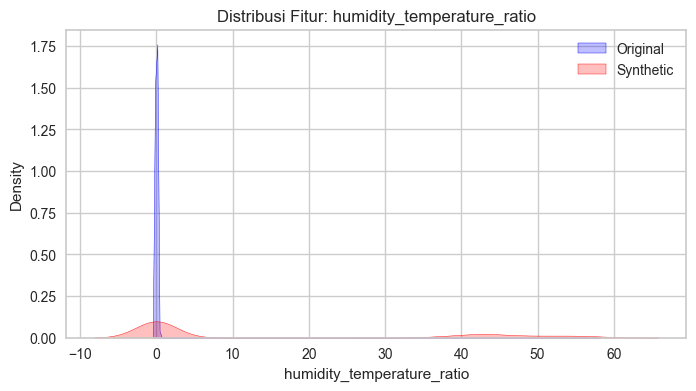

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_25308\2349289836.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")


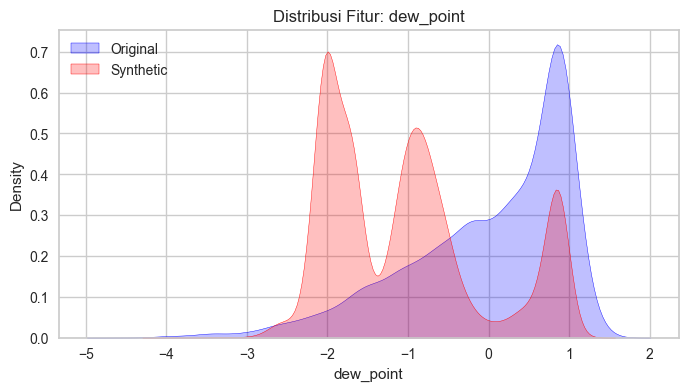


📈 Hasil Kolmogorov-Smirnov Test (Apakah Distribusi Berbeda?):
                              KS Statistic  P-Value
air_quality_Carbon_Monoxide       0.422250      0.0
air_quality_Ozone                 0.386663      0.0
air_quality_Sulphur_dioxide       0.534087      0.0
air_quality_Nitrogen_dioxide      0.575918      0.0
air_quality_PM2.5                 0.473982      0.0
air_quality_PM10                  0.398571      0.0
pm_ratio                          0.330354      0.0
wind_condition                    0.668086      0.0
humidity_temperature_ratio        0.338567      0.0
dew_point                         0.505575      0.0

📉 Hasil T-Test (Apakah Rata-rata Berbeda?):
                              T-Statistic        P-Value
air_quality_Carbon_Monoxide    -70.898809   0.000000e+00
air_quality_Ozone               67.630403   0.000000e+00
air_quality_Sulphur_dioxide   -109.260852   0.000000e+00
air_quality_Nitrogen_dioxide  -120.069774   0.000000e+00
air_quality_PM2.5             -150.

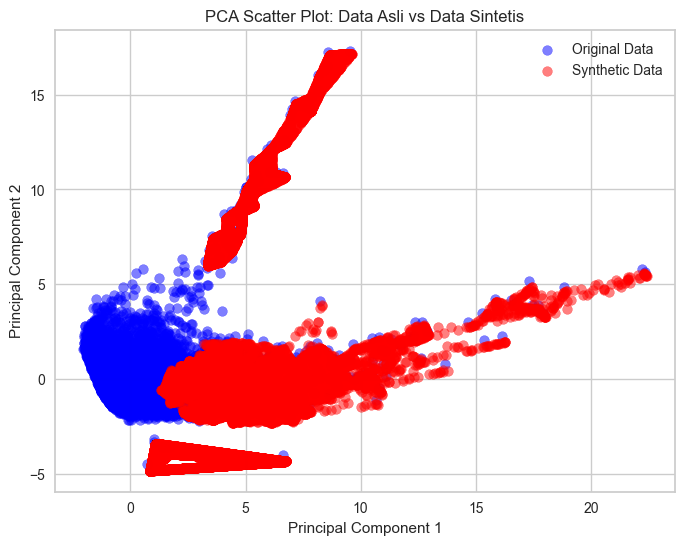

In [ ]:
from scipy.stats import ks_2samp, ttest_ind
from sklearn.decomposition import PCA

original_size = len(df)

df_synthetic = df_resampled.iloc[original_size:] 
df_original = df.iloc[:] 

print("Jumlah Data Asli:", len(df_original))
print("Jumlah Data Sintetis:", len(df_synthetic))

print("\nStatistik Data Asli:\n", df_original.describe())
print("\nStatistik Data Sintetis:\n", df_synthetic.describe())

for col in numeric_features.columns:  
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_original[col], label="Original", shade=True, color="blue")
    sns.kdeplot(df_synthetic[col], label="Synthetic", shade=True, color="red")
    plt.title(f"Distribusi Fitur: {col}")
    plt.legend()
    plt.show()

ks_results = {}
t_test_results = {}

for col in numeric_features.columns:
    ks_stat, ks_p = ks_2samp(df_original[col], df_synthetic[col])
    t_stat, t_p = ttest_ind(df_original[col], df_synthetic[col], equal_var=False)
    
    ks_results[col] = {"KS Statistic": ks_stat, "P-Value": ks_p}
    t_test_results[col] = {"T-Statistic": t_stat, "P-Value": t_p}

print("\nHasil Kolmogorov-Smirnov Test (Apakah Distribusi Berbeda?):")
print(pd.DataFrame(ks_results).T)

print("\nHasil T-Test (Apakah Rata-rata Berbeda?):")
print(pd.DataFrame(t_test_results).T)

pca = PCA(n_components=2)
pca_original = pca.fit_transform(df_original[numeric_features.columns])
pca_synthetic = pca.transform(df_synthetic[numeric_features.columns])

plt.figure(figsize=(8, 6))
plt.scatter(pca_original[:, 0], pca_original[:, 1], alpha=0.5, label="Original Data", color="blue")
plt.scatter(pca_synthetic[:, 0], pca_synthetic[:, 1], alpha=0.5, label="Synthetic Data", color="red")
plt.title("PCA Scatter Plot: Data Asli vs Data Sintetis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


## Kesimpulan Analisis hasil Cluster K-Means

### Kesimpulan Analisis Setiap Cluster Hasil Clustering KMeans

#### **Cluster 1**
- **Karakteristik Umum**: Cluster ini menunjukkan nilai tinggi pada polutan **Sulphur Dioxide** dan **Nitrogen Dioxide**, serta **PM2.5** dan **PM10**. Hal ini mengindikasikan adanya tingkat polusi udara yang cukup tinggi di cluster ini.
- **Air Quality**:
  - **Sulphur Dioxide**: Tinggi (+0.82), menunjukkan adanya polusi udara terkait dengan gas ini.
  - **Nitrogen Dioxide**: Positif (+0.59), menandakan tingkat polusi udara yang lebih tinggi akibat kendaraan bermotor atau industri.
- **PM**: **PM2.5** (5.29) dan **PM10** (12.61) juga menunjukkan tingkat partikulat yang lebih tinggi.
- **PM Ratio**: Sangat negatif (-2.35), menunjukkan ketidakseimbangan antara partikel PM2.5 dan PM10.
- **Humidity & Temperature**: **Humidity-Temperature Ratio** yang tinggi (1.71) dan **Dew Point** yang rendah (-0.02) menunjukkan kondisi kelembapan yang tidak begitu tinggi tetapi cukup sejuk.

#### **Cluster 2**
- **Karakteristik Umum**: Cluster ini menunjukkan nilai yang lebih rendah pada sebagian besar parameter kualitas udara dan partikulat, dengan **PM2.5** dan **PM10** yang lebih rendah daripada cluster lainnya. 
- **Air Quality**:
  - Nilai rendah untuk **Carbon Monoxide** (-0.11) dan **Ozone** (-0.30) menunjukkan kualitas udara yang relatif lebih baik.
  - **Sulphur Dioxide** dan **Nitrogen Dioxide** juga memiliki nilai yang rendah.
- **PM**: **PM2.5** (-0.24) dan **PM10** (-0.19) berada pada level yang lebih rendah, mencerminkan tingkat polusi udara yang lebih rendah dibandingkan dengan cluster lainnya.
- **PM Ratio**: Positif (0.51), menunjukkan distribusi partikulat PM2.5 dan PM10 yang lebih seimbang.
- **Humidity & Temperature**: **Humidity-Temperature Ratio** yang moderat (0.96) dan **Dew Point** yang sedikit lebih tinggi (0.01) menunjukkan keseimbangan antara suhu dan kelembapan.

#### **Cluster 3**
- **Karakteristik Umum**: Cluster ini memiliki kualitas udara yang bervariasi, dengan nilai tinggi pada **Ozone** dan nilai rendah pada **Sulphur Dioxide** dan **Nitrogen Dioxide**.
- **Air Quality**:
  - **Ozone** menunjukkan nilai yang tinggi (+0.74), sementara **Sulphur Dioxide** (-0.37) dan **Nitrogen Dioxide** (-0.45) menunjukkan tingkat yang lebih rendah.
- **PM**: **PM2.5** (-0.19) sangat rendah dan **PM10** (+0.04) mendekati nol, yang menunjukkan tingkat polusi udara yang rendah.
- **PM Ratio**: Nilai negatif (-1.04) yang menunjukkan ketidakseimbangan antara PM2.5 dan PM10.
- **Humidity & Temperature**: **Humidity-Temperature Ratio** (1.53) yang lebih tinggi menunjukkan tingkat kelembapan yang lebih besar, dan **Dew Point** yang sedikit negatif (-0.02).

#### **Cluster 4**
- **Karakteristik Umum**: Cluster ini memiliki kualitas udara yang buruk dengan nilai tinggi untuk **Carbon Monoxide**, **Sulphur Dioxide**, dan **Nitrogen Dioxide**.
- **Air Quality**:
  - **Carbon Monoxide** (+1.66), **Sulphur Dioxide** (+1.94), dan **Nitrogen Dioxide** (+1.99) menunjukkan tingkat polusi udara yang sangat tinggi.
  - **Ozone** (-0.69) sedikit lebih rendah, namun tetap menunjukkan kualitas udara yang buruk.
- **PM**: **PM2.5** (1.60) dan **PM10** (0.34) menunjukkan adanya polusi partikel yang lebih tinggi di area ini.
- **PM Ratio**: Positif (0.59), menunjukkan adanya distribusi yang relatif seimbang antara PM2.5 dan PM10.
- **Humidity & Temperature**: **Humidity-Temperature Ratio** (0.93) yang moderat dan **Dew Point** (0.02) yang sedikit lebih tinggi menunjukkan kondisi yang lebih hangat dan lembap.


## Kesimpulan Hasil Analisis clustering DBSCAN